In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load the Data set of train.csv and test.csv

In [2]:
# Load the the train.csv file 
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Calculing the Percantage of Women & Men who Survived

We are calculating the percentage of women who survived in a dataset. It assumes that there is a DataFrame called df_train with a column named "Sex" indicating the gender of each passenger and a column named "Survived" indicating whether each passenger survived or not.


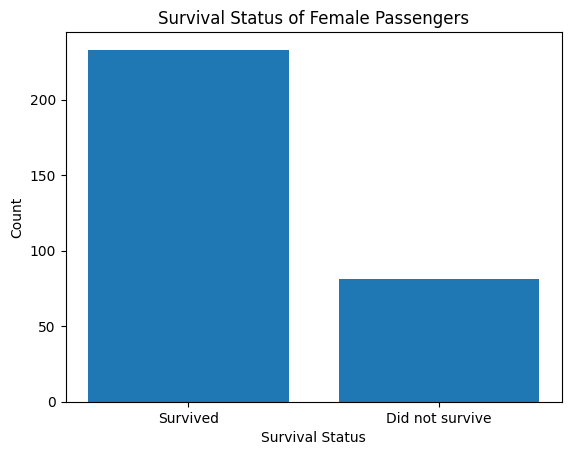

% of women who survived: 74.20382165605095


In [4]:
import matplotlib.pyplot as plt

# Select the rows in the 'df_train' DataFrame where the 'Sex' column is equal to 'female'
women = df_train.loc[df_train.Sex == 'female']

# Extract the 'Survived' column from the selected rows, representing survival status of female passengers
survived_women = women["Survived"]

# Calculate the sum of values in the 'survived_women' column (number of female passengers who survived)
survived_count = sum(survived_women)

# Calculate the total number of female passengers
total_women = len(women)

# Calculate the percentage of women who survived
rate_women = (survived_count / total_women) * 100

# Plot the histogram
plt.bar(['Survived', 'Did not survive'], [survived_count, total_women - survived_count])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Status of Female Passengers')
plt.show()


# Print the percentage of women who survived
print("% of women who survived:", rate_women)

In [5]:
# Select the rows in the 'df_train' DataFrame where the 'Sex' column is equal to 'female'
women = df_train.loc[df_train.Sex == 'female']

# Extract the 'Survived' column from the selected rows, representing survival status of female passengers
survived_women = women["Survived"]

# Calculate the sum of values in the 'survived_women' column (number of female passengers who survived)
survived_count = sum(survived_women)

# Calculate the total number of female passengers
total_women = len(women)

# Calculate the percentage of women who survived
rate_women = (survived_count / total_women) * 100

# Print the percentage of women who survived
print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


We are calculating the percentage of men  who survived in a dataset. It assumes that there is a DataFrame called df_train with a column named "Sex" indicating the gender of each passenger and a column named "Survived" indicating whether each passenger survived or not.

% of men who survived: 18.890814558058924


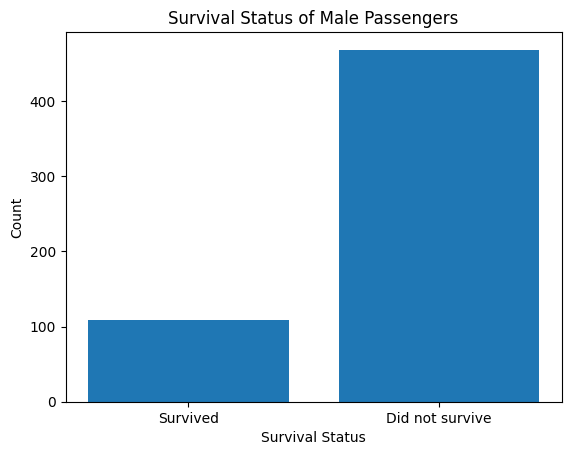

% of men who survived: 18.890814558058924


In [6]:
# Select the rows in the 'df_train' DataFrame where the 'Sex' column is equal to 'male'
men = df_train.loc[df_train.Sex == 'male']

# Extract the 'Survived' column from the selected rows, representing survival status of male passengers
survived_men = men["Survived"]

# Calculate the sum of values in the 'survived_men' column (number of male passengers who survived)
survived_count = sum(survived_men)

# Calculate the total number of male passengers
total_men = len(men)

# Calculate the percentage of men who survived
rate_men = (survived_count / total_men) * 100

# Print the percentage of men who survived
print("% of men who survived:", rate_men)

# Plot the histogram
plt.bar(['Survived', 'Did not survive'], [survived_count, total_men - survived_count])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Status of Male Passengers')
plt.show()


# Print the percentage of women who survived
print("% of men who survived:", rate_men)

## Applying Random Forest Model for Prediction

A Random Forest model is an ensemble learning algorithm commonly used for classification and regression tasks in machine learning. It combines multiple decision trees, each trained on a random subset of the original dataset, to make predictions. By aggregating the predictions of individual trees, the Random Forest model produces a final prediction. It is known for its ability to handle high-dimensional data, handle missing values and outliers, and provide good generalization performance. So we are going to apply this model on gender based on the survival (Male or Female).



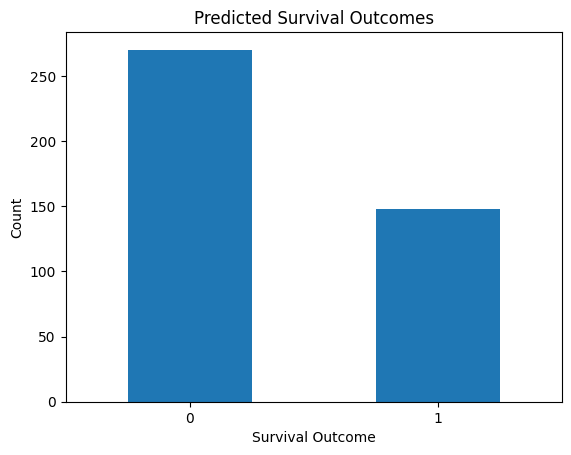

Your submission was successfully saved!


In [7]:
import matplotlib.pyplot as plt

# Import the RandomForestClassifier class from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier

# Extract the target variable "Survived" from the df_train DataFrame
target = df_train["Survived"]

# Define a list of features to be used as input for the model
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Create the feature matrix X by converting categorical variables into numeric dummy variables
features_matrix = pd.get_dummies(df_train[features])

# Create the feature matrix X_test for the test data
test_features_matrix = pd.get_dummies(df_test[features])

# Create a Random Forest classifier object with specified parameters
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the model using the feature matrix X and target variable target
model.fit(features_matrix, target)

# Make predictions on the test data using the trained model
predictions = model.predict(test_features_matrix)

# Create a DataFrame with passenger IDs and predicted survival outcomes
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})

# Visualize the predicted survival outcomes
survived_count = output['Survived'].value_counts()
survived_count.plot(kind='bar')
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
plt.title('Predicted Survival Outcomes')
plt.xticks(rotation=0)
plt.show()

# Save the DataFrame as a CSV file without including the index column
output.to_csv('submission.csv', index=False)
# Print a success message
print("Your submission was successfully saved!")